In [23]:
from ipynb.fs.full.cs_entities import ProjectForAnalysis, SystemBoundaries
from ipynb.fs.full.cs_analysis import \
    HotspotAnalysis, \
    StaticFileComplexityAnalysis, TrendFileComplexityAnalysis, \
    SystemCouplingAnalysis, FileCouplingAnalysis, \
    ParallelWorkAnalysis, MainDeveloperAnalysis

## Create projects for analysis objects

Need to specify the location of the local git directory, and optionally include a *before* and *after* date (in the form YYYY-MM-DD) to limit the timespan for the analysis.

In [2]:
boundaries_dict = {
    "Code": ["src/code_maat"],
    "Test": ["test/code_maat"],
}
code_maat = ProjectForAnalysis(
    "/home/brombaut/work/code-maat",
    system_boundaries=SystemBoundaries(boundaries_dict)
)

In [3]:
# code_maat = ProjectForAnalysis("/home/brombaut/work/code-maat")
# benrombautca = ProjectForAnalysis("/home/brombaut/work/benrombautca")
# hibernate = ProjectForAnalysis("/home/brombaut/work/hibernate-orm", before="2013-09-05", after="2012-01-01")
craft = ProjectForAnalysis("/home/brombaut/work/Craft.Net", before="2013-01-01")

Executing: git -C /home/brombaut/work/Craft.Net checkout db70d9ac17bf972352e93f74f1253dd9861706e6


### Perform a Hotspot analysis

In [4]:
hs_analysis = HotspotAnalysis(code_maat).analyze()

See what the primary hotspots in the project for the timespan is

In [5]:
hs_analysis.df().head(10)

,module,revisions,code
0,src/code_maat/analysis/logical_coupling.clj,26,145
1,src/code_maat/app/app.clj,25,85
2,src/code_maat/core.clj,21,35
3,test/code_maat/end_to_end/scenario_tests.clj,20,91
4,project.clj,19,17
5,src/code_maat/parsers/svn.clj,19,53
6,src/code_maat/parsers/git.clj,14,31
7,src/code_maat/analysis/authors.clj,14,47
8,test/code_maat/analysis/logical_coupling_test.clj,13,89
9,README.md,11,87


In [6]:
hs_analysis.enclosure_diagram()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### File Complexity Analysis
Based off of file indentation patterns

In [7]:
static_file_complexity = StaticFileComplexityAnalysis(
    craft, "Craft.Net.Server/MinecraftServer.cs"
)
static_file_complexity.analyze()

##### Current file complexity stats

In [8]:
static_file_complexity.df()

,n,total,mean,sd,max
0,507,1842.5,3.63,2.37,11.5


##### File complexity trends

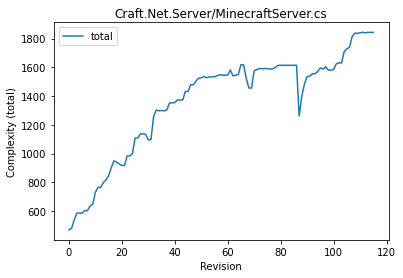

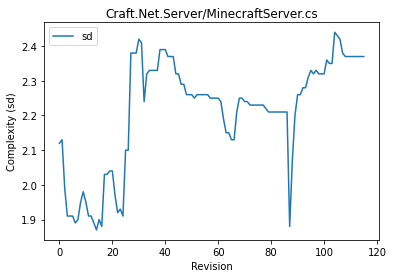

In [9]:
file_complexity_trend = TrendFileComplexityAnalysis(
    craft,
    "Craft.Net.Server/MinecraftServer.cs"
)
file_complexity_trend.analyze()
file_complexity_trend.total_trend_line_plot().sd_trend_line_plot()

### Sum of Coupling Analysis

In [10]:
# soc_analysis = SumOfCouplingAnalysis(craft).analyze()
# soc_analysis.soc_data().head(10)
# ftc_analysis = FileTemporalCouplingAnalysis(craft, "Craft.Net.Server/MinecraftServer.cs").analyze()
# ftc_analysis.enclosure_diagram()

### System Coupling Analysis

In [11]:
boundaries_dict = {
    "Code": ["src/code_maat"],
    "Analysis Test": ["test/code_maat/analysis"],
    "Dataset Test": ["test/code_maat/dataset"],
    "End to end Test": ["test/code_maat/end_to_end"],
    "Parsers Test": ["test/code_maat/parsers"],
}
boundaries = SystemBoundaries(boundaries_dict)
craft = ProjectForAnalysis("/home/brombaut/work/code-maat", system_boundaries=boundaries)
coupling_data = SystemCouplingAnalysis(craft).analyze().df()
coupling_data

,entity,coupled,degree,average-revs
0,Code,End to end Test,42,50
1,Analysis Test,Code,42,49
2,Code,Parsers Test,41,49


In [25]:
# Different example
benrombautca = ProjectForAnalysis("/home/brombaut/work/benrombautca")
coupling_data = SystemCouplingAnalysis(benrombautca).analyze().df()
coupling_data.head()

,entity,coupled,degree,average-revs
0,src/components/ConnectorElements/ConnectorElementSingleDownward.vue,src/components/ConnectorElements/ConnectorElementSingleUpward.vue,100,5
1,src/articles/authored_articles_content.json,src/articles/authored_articles_meta.json,97,22
2,package-lock.json,package.json,87,110
3,src/software/software_articles_content.json,src/software/software_articles_meta.json,84,10
4,src/site-header/FullNavBar.vue,src/site-header/FullNavItem.vue,83,6


### File Coupling Analysis

In [13]:
benrombautca = ProjectForAnalysis("/home/brombaut/work/benrombautca")
file_coupling_analysis = FileCouplingAnalysis(benrombautca, "src/bookshelf/BookshelfSection.vue")
file_coupling_analysis.analyze().df()

,entity,coupled,degree,average-revs
13,src/bookshelf/BookshelfSection.vue,src/bookshelf/cached-bookshelf.ts,50,14
21,src/bookshelf/BookCard.vue,src/bookshelf/BookshelfSection.vue,31,22


In [16]:
file_coupling_analysis.analyze().enclosure_diagram()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Parallel Work Analysis

In [20]:
craft = ProjectForAnalysis("/home/brombaut/work/Craft.Net")
an = ParallelWorkAnalysis(craft)
an.analyze()
an.df().head()

,entity,n-authors,n-revs
0,Craft.Net.Server/MinecraftClient.cs,4,70
1,Craft.Net.Server/Packets/PlayerDiggingPacket.cs,4,20
2,Craft.Net.Server/Packets/PlayerPositionPacket.cs,4,18
3,Craft.Net.Server/Packets/EncryptionKeyResponsePacket.cs,4,15
4,Craft.Net.Server/Packets/EncryptionKeyRequestPacket.cs,4,13


In [21]:
an.enclosure_diagram()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
craft = ProjectForAnalysis("/home/brombaut/work/Craft.Net")
an = MainDeveloperAnalysis(craft)
an.analyze()
an.df()

,entity,main-dev,added,total-added,ownership
0,.gitignore,Drew DeVault,20,20,1.0
1,.gitmodules,Drew DeVault,7,10,0.7
2,BouncyCastle.Crypto.dll,Drew DeVault,0,0,0.0
3,BouncyCastle.Crypto.dll => lib/BouncyCastle.Crypto.dll,Drew DeVault,0,0,0.0
4,Craft.Net.Client/ConsoleLogWriter.cs,Drew DeVault,36,36,1.0
...,...,...,...,...,...
1320,{Craft.Net.Server/Worlds => Craft.Net.Data}/Region.cs,Drew DeVault,3,3,1.0
1321,{Craft.Net.Server/Worlds => Craft.Net.Data}/Section.cs,Drew DeVault,2,2,1.0
1322,{Craft.Net.Server/Worlds => Craft.Net.Data}/Size.cs,Drew DeVault,1,1,1.0
1323,{Craft.Net.Server/Worlds => Craft.Net.Data}/Vector3.cs,Drew DeVault,1,1,1.0
